In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("clean_mkUltimatum_Game_Conflict1.csv")

In [4]:
#Create unique players
df["player_nb"] = df["player"]
df["player"] = df["player"].astype(str)
df["player"] = df["player"] + df["participant_code"]

#combine session code with mastok session
df['mk_session'] = df['mk_session'].replace('mk:Ultimatum_Game_Real:', 'mk_', regex=True)
df['mk_session'] = df['mk_session'] + "_" + df['session_code']

7.82


<Axes: xlabel='sent_amount', ylabel='Count'>

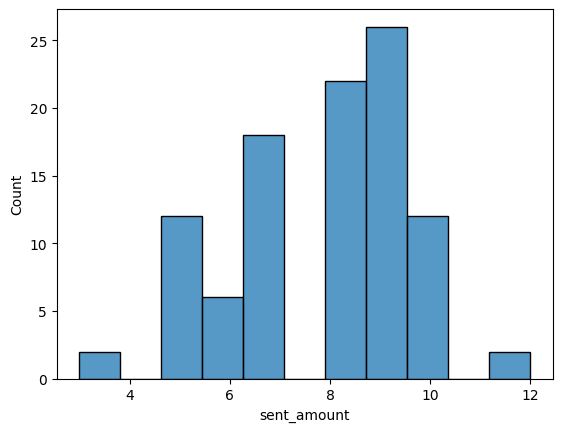

In [6]:
print(df["sent_amount"].mean()) #7.2
sns.histplot(x = "sent_amount", data=df)

### Trial payoff

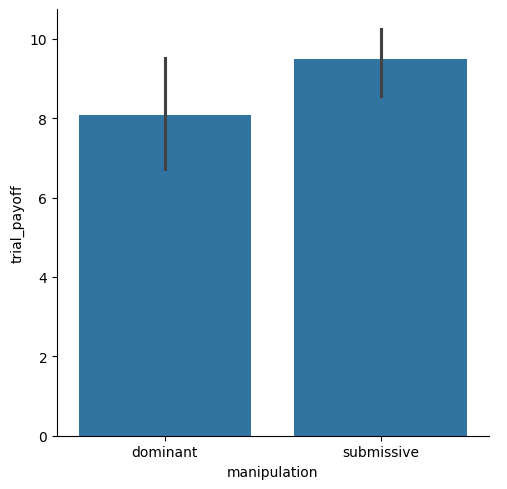

In [9]:
df_proposer = df.loc[df["role"] != "responder"]
df_analysis = df_proposer.groupby(["manipulation", "player"])['trial_payoff'].mean().reset_index()
sns.catplot(x = "manipulation", y = "trial_payoff", data = df_analysis, kind = "bar")

### Acceptance rate

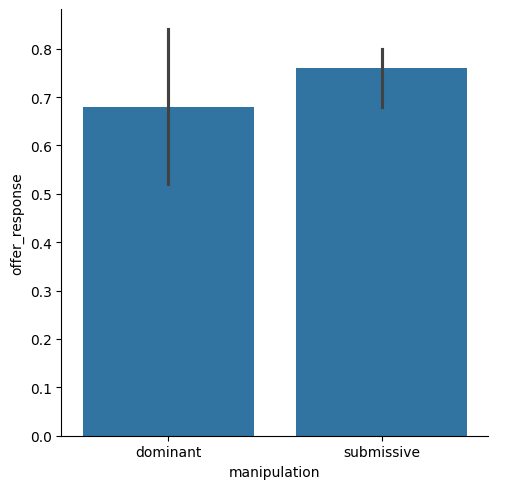

In [14]:
df_analysis = df_proposer.groupby(["manipulation", "player"])['offer_response'].mean().reset_index()
sns.catplot(x = "manipulation", y = "offer_response", data = df_analysis, kind = "bar")